# Tugas 2 Individu Pembelajaran Mesin

Nama: R. Ferdian Dita Nugraha

NIM: 21/476963/PA/20622

## Mengimpor Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Membaca Data

In [2]:
df = pd.read_csv('car.data')


## Exploratory Data Analysis

In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names

In [4]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Terdapat 1727 data dengan masing-masing 7 kolom

In [6]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


### Mengecek missing values

In [7]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Tidak ada missing values

### Distribusi frekuensi tiap kolom

In [8]:
for col in col_names:
    print(df[col].value_counts())
    print()
    print("--------------------------------------------------")

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64

--------------------------------------------------
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64

--------------------------------------------------
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64

--------------------------------------------------
4       576
more    576
2       575
Name: persons, dtype: int64

--------------------------------------------------
med      576
big      576
small    575
Name: lug_boot, dtype: int64

--------------------------------------------------
med     576
high    576
low     575
Name: safety, dtype: int64

--------------------------------------------------
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

--------------------------------------------------


<AxesSubplot: xlabel='class', ylabel='count'>

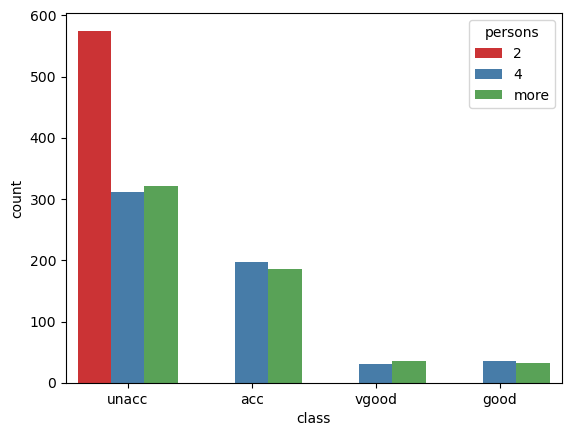

In [9]:
sns.countplot(x='class', data=df, palette='Set1', hue='persons')

Informasi:
* Jika kendaraan memiliki kapasitas 2 orang, maka otomatis unaccepted

<AxesSubplot: xlabel='class', ylabel='count'>

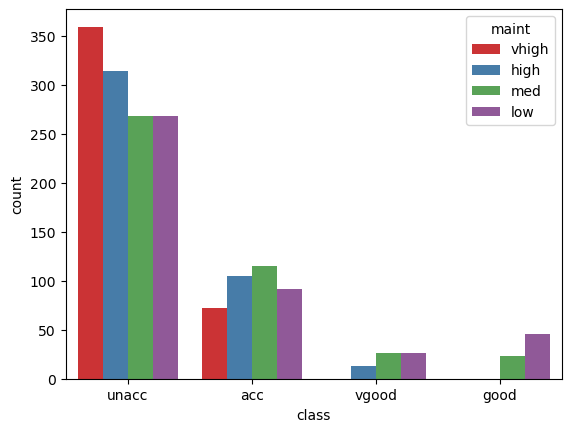

In [10]:
sns.countplot(x='class', data=df, palette='Set1', hue='maint')

<AxesSubplot: xlabel='class', ylabel='count'>

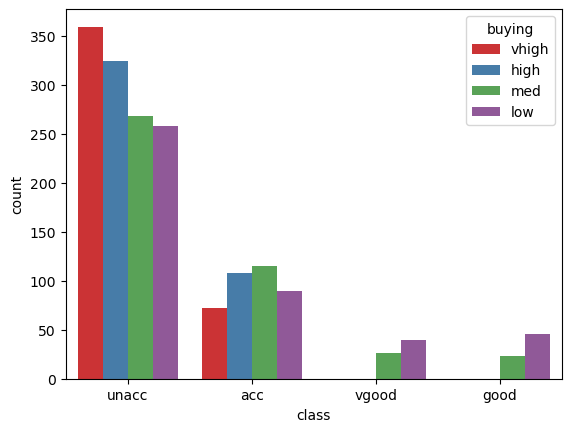

In [11]:
sns.countplot(x='class', data=df, palette='Set1', hue='buying')

<AxesSubplot: xlabel='class', ylabel='count'>

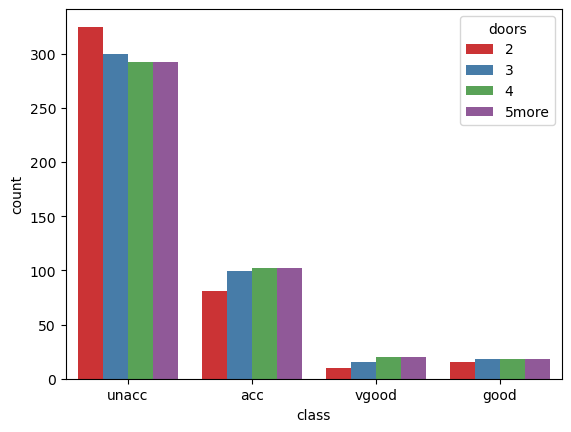

In [12]:
sns.countplot(x='class', data=df, palette='Set1', hue='doors')

<AxesSubplot: xlabel='class', ylabel='count'>

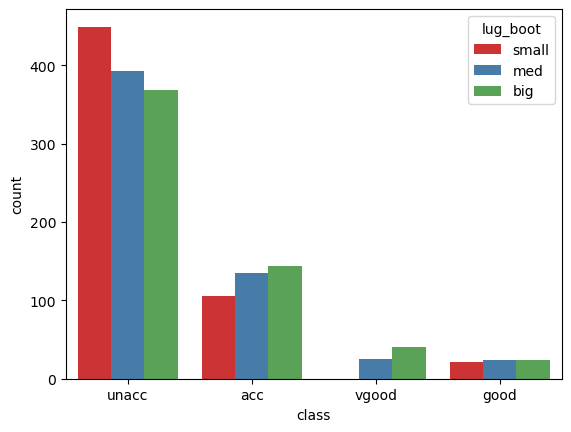

In [13]:
sns.countplot(x='class', data=df, palette='Set1', hue='lug_boot')

<AxesSubplot: xlabel='class', ylabel='count'>

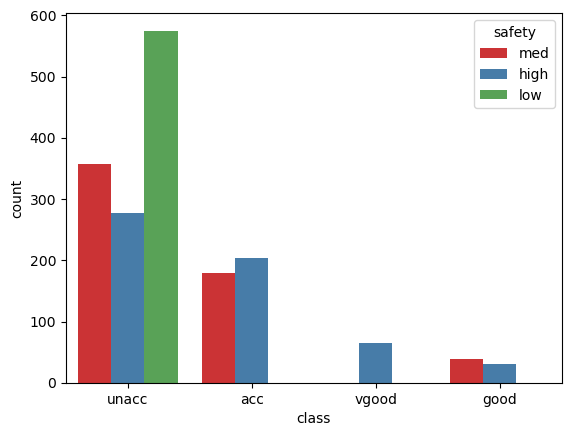

In [14]:
sns.countplot(x='class', data=df, palette='Set1', hue='safety')

## Data Preprocessing

### Encoding Fitur

In [15]:
from sklearn.preprocessing import OrdinalEncoder
orenc = OrdinalEncoder()

In [16]:
X = df.drop('class', axis=1)
y = df['class']

In [17]:
X_encoded = orenc.fit_transform(X)
X[X.columns] = X_encoded
X

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,0.0,0.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0
2,3.0,3.0,0.0,0.0,1.0,1.0
3,3.0,3.0,0.0,0.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0
1723,1.0,1.0,3.0,2.0,1.0,0.0
1724,1.0,1.0,3.0,2.0,0.0,1.0
1725,1.0,1.0,3.0,2.0,0.0,2.0


### Splitting Data

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Check the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1381, 6), (346, 6), (1381,), (346,))

## Modelling

### Build Model

In [20]:
from sklearn.tree import DecisionTreeClassifier

clas_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3)

# fit the model
clas_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

### Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

max_depths = list(range(1, 10))
min_sample_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
criterions = ['gini', 'entropy']

param_grid = {'max_depth': max_depths,
            'min_samples_split': min_sample_splits,
            'min_samples_leaf': min_samples_leafs,
            'criterion': criterions}

grid_search = GridSearchCV(clas_gini, param_grid, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_index_)


Fitting 5 folds for each of 900 candidates, totalling 4500 fits
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}
0.7784152147752839
DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.1, min_samples_split=0.1,
                       random_state=42)
150


In [22]:
clas_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=4, min_samples_leaf=0.1, min_samples_split=0.1)

# fit the model
clas_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.1, min_samples_split=0.1,
                       random_state=42)

In [23]:
y_pred_gini = clas_gini.predict(X_test)

In [24]:
# Checking accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_gini)

0.7803468208092486

## Model Evaluation

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [26]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

         acc       0.51      0.75      0.61        77
        good       0.00      0.00      0.00        15
       unacc       0.91      0.89      0.90       237
       vgood       0.00      0.00      0.00        17

    accuracy                           0.78       346
   macro avg       0.36      0.41      0.38       346
weighted avg       0.74      0.78      0.75       346



c:\Users\ferdi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ferdi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ferdi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Visualisasi Decision Tree

[Text(0.3333333333333333, 0.9, 'x[3] <= 0.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 458\nvalue = [0, 0, 458, 0]'),
 Text(0.4444444444444444, 0.7, 'x[5] <= 0.5\ngini = 0.573\nsamples = 923\nvalue = [307, 54, 514, 48]'),
 Text(0.2222222222222222, 0.5, 'x[2] <= 1.5\ngini = 0.62\nsamples = 302\nvalue = [165, 20, 69, 48]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.608\nsamples = 153\nvalue = [83, 10, 44, 16]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.618\nsamples = 149\nvalue = [82, 10, 25, 32]'),
 Text(0.6666666666666666, 0.5, 'x[5] <= 1.5\ngini = 0.431\nsamples = 621\nvalue = [142, 34, 445, 0]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.0\nsamples = 308\nvalue = [0, 0, 308, 0]'),
 Text(0.7777777777777778, 0.3, 'x[2] <= 1.5\ngini = 0.591\nsamples = 313\nvalue = [142, 34, 137, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.568\nsamples = 152\nvalue = [61, 13, 78, 0]'),
 Text(0.8888888888888888, 0.1, 'gini = 0.596\ns

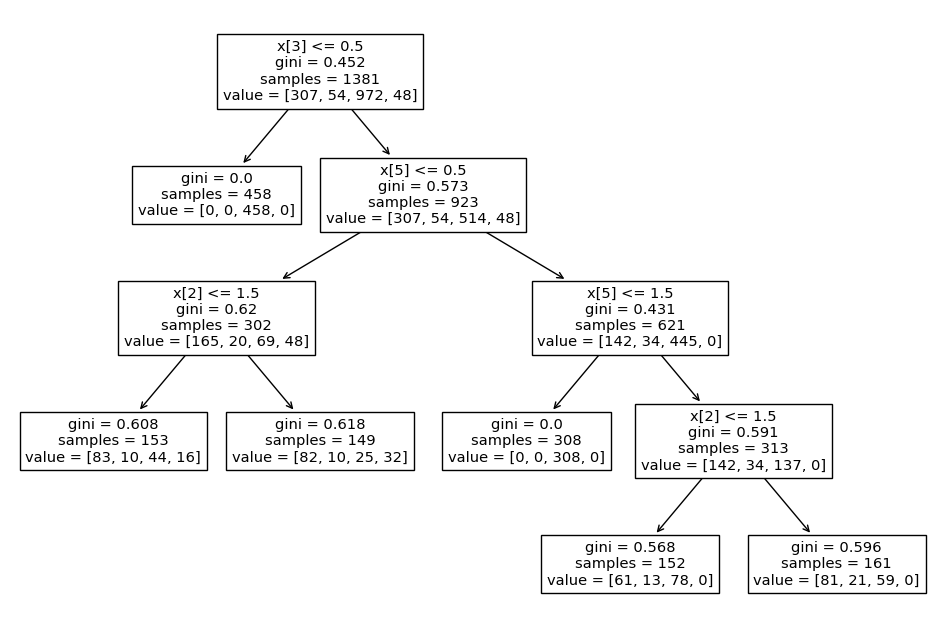

In [27]:
plt.figure(figsize=(12, 8))

from sklearn import tree

tree.plot_tree(clas_gini.fit(X_train, y_train))